<a href="https://colab.research.google.com/github/morenoloza98/Notebooks/blob/master/Tarea5_WoAns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Integrantes
Kevin A. Ruvalcaba Perez - A01652241 
https://github.com/KevinRuvalcaba/sistemas-inteligentes

Santiago Gutiérrez Bárcenas - A01652520
https://github.com/SantiagoGutierrezB/Sistemas_Inteligentes

Alejandro Moreno Loza - A01654319
https://github.com/morenoloza98/Notebooks

Diego Moreno Rodríguez A01337594
https://github.com/DiegoMoreno1110/Sistemas_Inteligentes_

<h1><center>Inteligencia Artificial</center></h1>


<h2><center>Tarea 5 - Inferencia Bayesiana y EDA (Exploración de Datos)</center></h2>

---

#### El **objetivo** de esta tarea es realizar un análisis exploratorio básico sobre el conjunto de datos proporcionado (pedidos de clientes a lo largo del tiempo). 


* Además, deberán agregar su informacción correspondiente del equipo que hayan formado, así como el link de github correspondiente al cual cargarán la notebook (ejecutada previamente), para visualizar las respuestas.

---
#Aquí sus datos

---

### Objetivo

Predecir qué productos estarán en el próximo pedido de un usuario. El conjunto de datos es anónimo y contiene una muestra de más de 3 millones de pedidos de comestibles de más de 200,000 usuarios de Instacart.

Para cada usuario se entregan 4 y 100 de sus pedidos, con la secuencia de productos comprados en cada pedido

<img src="https://shukka.com/img/xeda.PNG.pagespeed.ic.MVCnc5-70D.png" />

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

In [ ]:
from subprocess import check_output
print(check_output(["ls", "."]).decode("utf8"))

aisles.csv
departments.csv
order_products__prior.csv
order_products__train.csv
orders.csv
products.csv
sample_data



In [ ]:
aisles_df = pd.read_csv("./aisles.csv")
departments_df = pd.read_csv("./departments.csv")
order_products_prior_df = pd.read_csv("./order_products__prior.csv")
order_products_train_df = pd.read_csv("./order_products__train.csv")
orders_df = pd.read_csv("./orders.csv")
products_df = pd.read_csv("./products.csv")

In [ ]:
#Así se despliega información del cabezal del dataframe
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [ ]:
order_products_train_df.head()


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [ ]:
order_products__prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


## ¿Qué contiene cada archivo?

Ordenes con sus porductos respectivos.

# Aquí su respuesta

-----

Como se mencionó anteriormente, en este conjunto de datos, se dan de 4 a 100 pedidos de un cliente (lo veremos más adelante) y necesitamos predecir los productos que se volverán a ordenar. Así que el último pedido del usuario se ha extraído y dividido en conjuntos de prueba y de entrenamiento. 

Todas las informaciones de pedidos anteriores del cliente están presentes en el archivo order_products_prior. También podemos notar que hay una columna en el archivo orders.csv llamada eval_set que nos dice a cuál de los tres conjuntos de datos (previo, entrenamiento o prueba) va la fila dada.

-----

Primero obtengamos el recuento de filas en cada uno de los tres conjuntos.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


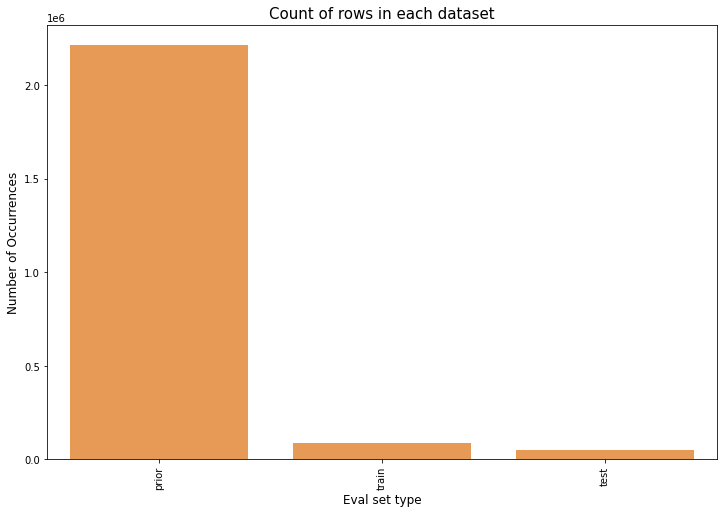

In [ ]:
cnt_srs = orders_df.eval_set.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Eval set type', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
def get_unique_count(x):
    return len(np.unique(x))

cnt_srs = orders_df.groupby("eval_set")["user_id"].aggregate(get_unique_count)
cnt_srs

eval_set
prior    141784
test      51680
train     90104
Name: user_id, dtype: int64

# ¿Qué significan los valores anterior? Suponiendo que teníamos un total de clientes...

### Aquí su respuesta

Ahora validemos la afirmación de que se dan de 4 a 100 pedidos de un cliente.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]),
 <a list of 97 Text major ticklabel objects>)

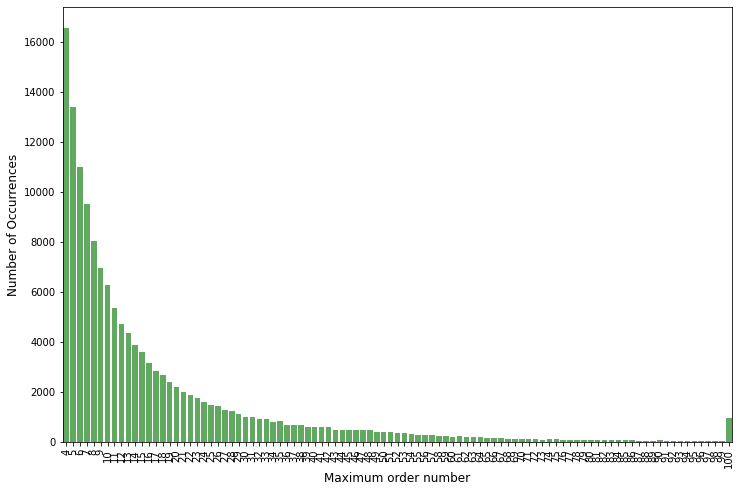

In [ ]:
cnt_srs = orders_df.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
cnt_srs = cnt_srs.order_number.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.xticks(rotation='vertical')

Por lo tanto, no hay pedidos de menos de 4 y tiene un límite máximo de 100 como se indica en la página de datos.

Ahora veamos cómo cambia el hábito de hacer pedidos con el día de la semana.

Text(0.5, 1.0, 'Frequency of order by week day')

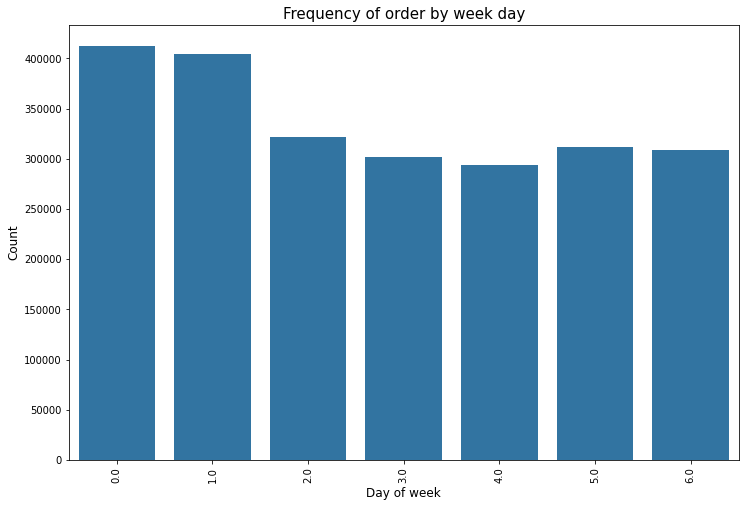

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_dow", data=orders_df, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)

## ¿Cuáles són los días con mayor y menor cantidad de pedidos?

## Aquí su respuesta

Ahora veremos cómo es la distribución con respecto a la hora del día.

Text(0.5, 0, 'Hour of day')

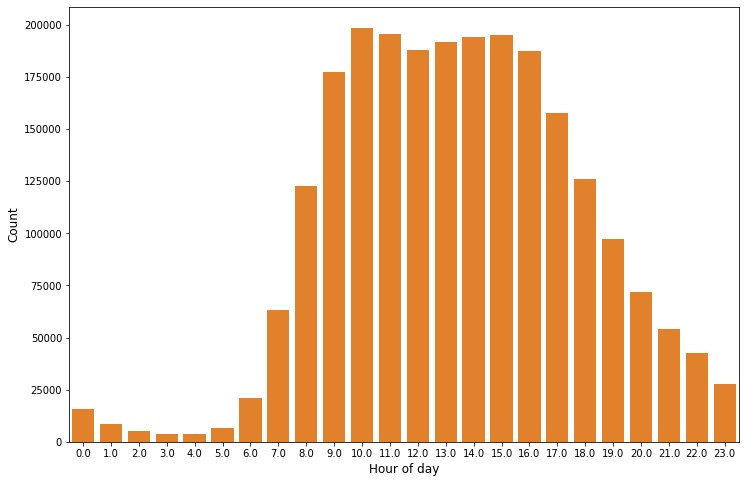

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=orders_df, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)

# ¿En qué periodo de tiempo se realiza la mayor cantidad de pedidos? 

Ahora combinemos el día de la semana y la hora del día para ver la distribución.

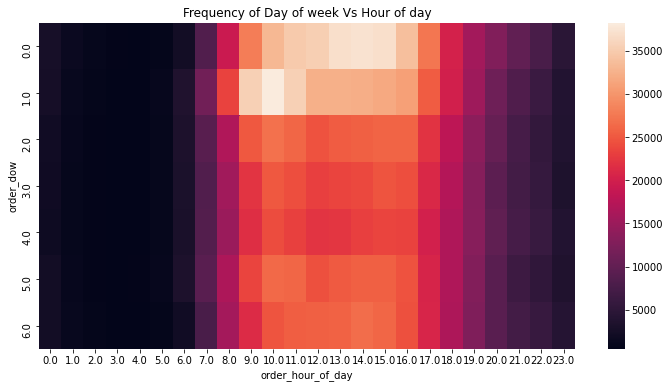

In [ ]:
grouped_df = orders_df.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

# ¿Cuándo es el mejor momento para realizar pedidos acorde a lo anterior?

---

## Aquí su respuesta

Ahora revisemos el intervalo de tiempo entre los pedidos.

Text(0.5, 0, 'Days since prior order')

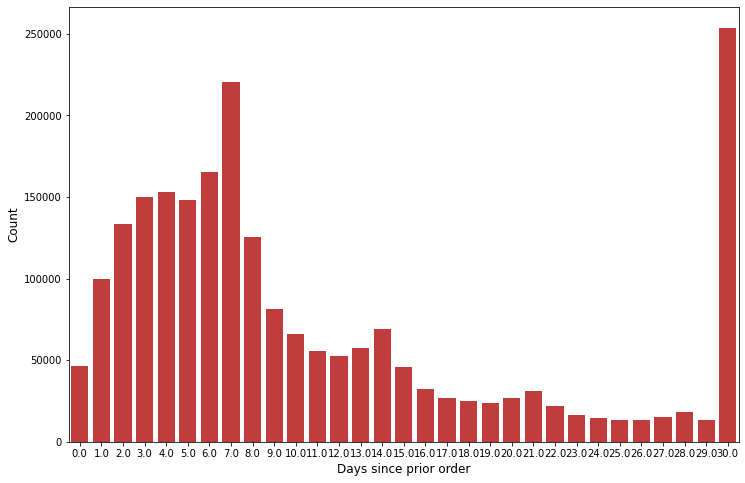

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders_df, color=color[3])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)


# Parece que los clientes hacen pedidos... ¿cada cuánto?

### Aquí su respuesta
---

# Según la tendencia, ¿hay otros días que muestren picos pequeños?

### Aquí su respuesta
---


Dado que nuestro objetivo es averiguar los reordenamientos, veamos el porcentaje de reorden en la serie anterior y la serie de trenes.

In [ ]:
# percentage of re-orders in prior set #
order_products_train_df
order_products_prior_df.reordered.sum() / order_products_prior_df.shape[0]

0.5897735176629845

In [ ]:
# percentage of re-orders in train set #
order_products_train_df.reordered.sum() / order_products_train_df.shape[0]

0.5985944127509629

## ¿Qué significan los valores anteriores?

### Aquí su respuesta

---

### No hay productos reordenados:

Ahora que hemos visto que el 59% de los productos se vuelven a pedir, también habrá situaciones en las que no se vuelva a pedir ninguno de los productos. Comprobemos eso ahora.

In [ ]:
grouped_df = order_products_prior_df.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grouped_df["reordered"].loc[grouped_df["reordered"]>1] = 1
grouped_df.reordered.value_counts() / grouped_df.shape[0]

1.0    0.879103
0.0    0.120897
Name: reordered, dtype: float64

In [ ]:
grouped_df = order_products_train_df.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grouped_df["reordered"].loc[grouped_df["reordered"]>1] = 1
grouped_df.reordered.value_counts() / grouped_df.shape[0]

1    0.93444
0    0.06556
Name: reordered, dtype: float64

# ¿Y en esta sección?

### Aquí su respuesta

----

Ahora veamos la cantidad de productos comprados en cada pedido.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Number of products in the given order')

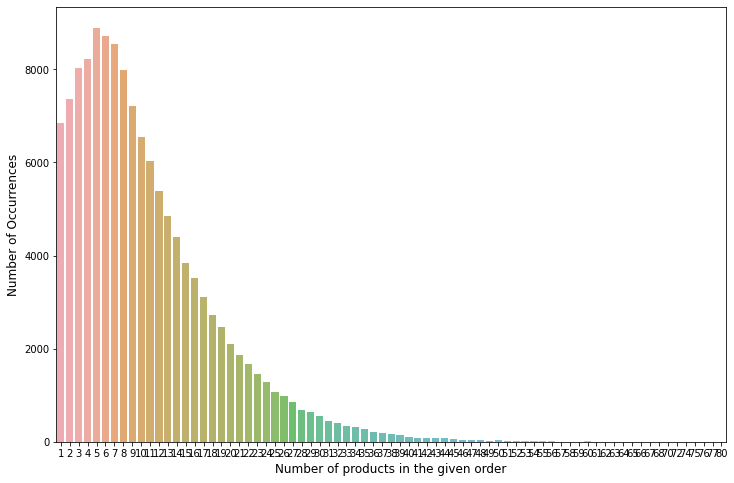

In [ ]:
grouped_df = order_products_train_df.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
cnt_srs = grouped_df.add_to_cart_order.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of products in the given order', fontsize=12)


# ¿Cuál es el valor más alto?

### Aquí su respuesta

El priducto con ID 5

---

Antes de explorar los detalles del producto, veamos también los otros tres archivos.

In [ ]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [ ]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [ ]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


Ahora fusionemos estos detalles del producto con los detalles de order_prior.

In [ ]:
order_products_prior_df = pd.merge(order_products_prior_df, products_df, on='product_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, aisles_df, on='aisle_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, departments_df, on='department_id', how='left')
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120.0,1.0,1.0,Organic Egg Whites,86.0,16.0,eggs,dairy eggs
1,2,28985.0,2.0,1.0,Michigan Organic Kale,83.0,4.0,fresh vegetables,produce
2,2,9327.0,3.0,0.0,Garlic Powder,104.0,13.0,spices seasonings,pantry
3,2,45918.0,4.0,1.0,Coconut Butter,19.0,13.0,oils vinegars,pantry
4,2,30035.0,5.0,0.0,Natural Sweetener,17.0,13.0,baking ingredients,pantry


In [ ]:
cnt_srs = order_products_prior_df['product_name'].value_counts().reset_index().head(20)
cnt_srs.columns = ['product_name', 'frequency_count']
cnt_srs

,product_name,frequency_count
0,Banana,335919
1,Bag of Organic Bananas,269291
2,Organic Strawberries,187998
3,Organic Baby Spinach,171352
4,Organic Hass Avocado,151476
5,Organic Avocado,125458
6,Large Lemon,108416
7,Strawberries,101301
8,Limes,99840
9,Organic Whole Milk,98099


# ¿Qué podemos inferir de los resultados anteriores?


### aquí su respuesta

Las banas son muy populares !!

---

Ahora echemos un vistazo a los pasillos importantes.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


fresh fruits    2586200
Name: aisle, dtype: int64

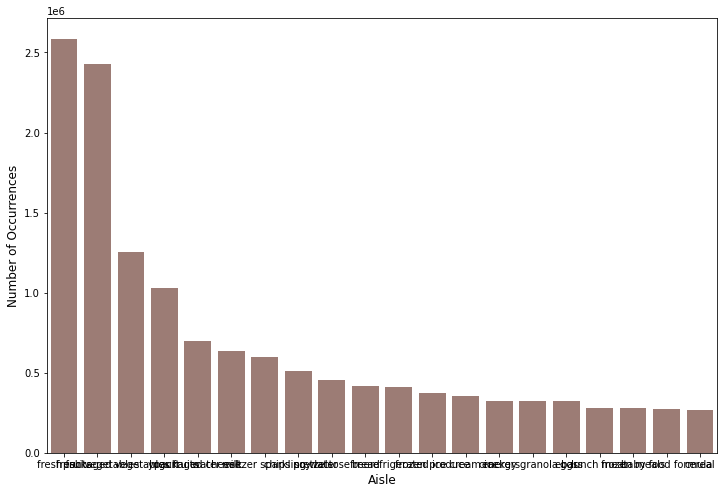

In [ ]:
cnt_srs = order_products_prior_df['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[5])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
order_products_prior_df['aisle'].value_counts().head(1)

# ¿Cuáles son los pasillos con mayor valor?

### Aquí su respuesta


Fresh Fruits !!
----

### Distribución departamental:

Veamos ahora la distribución inteligente del departamento.


Text(0.5, 1.0, 'Departments distribution')

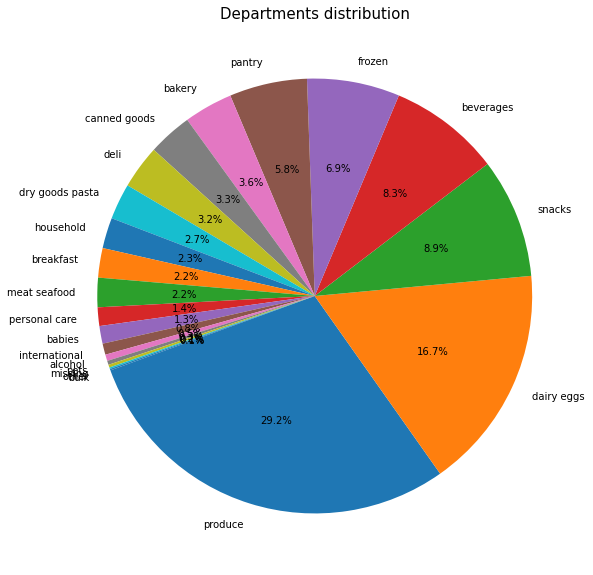

In [ ]:
plt.figure(figsize=(10,10))
temp_series = order_products_prior_df['department'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)

# ¿Cuál es el departamento más grande? y ¿por cuales es seguido?

### Aquí su respuesta

Produce
---

### Relación de pedidos por departamento:

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


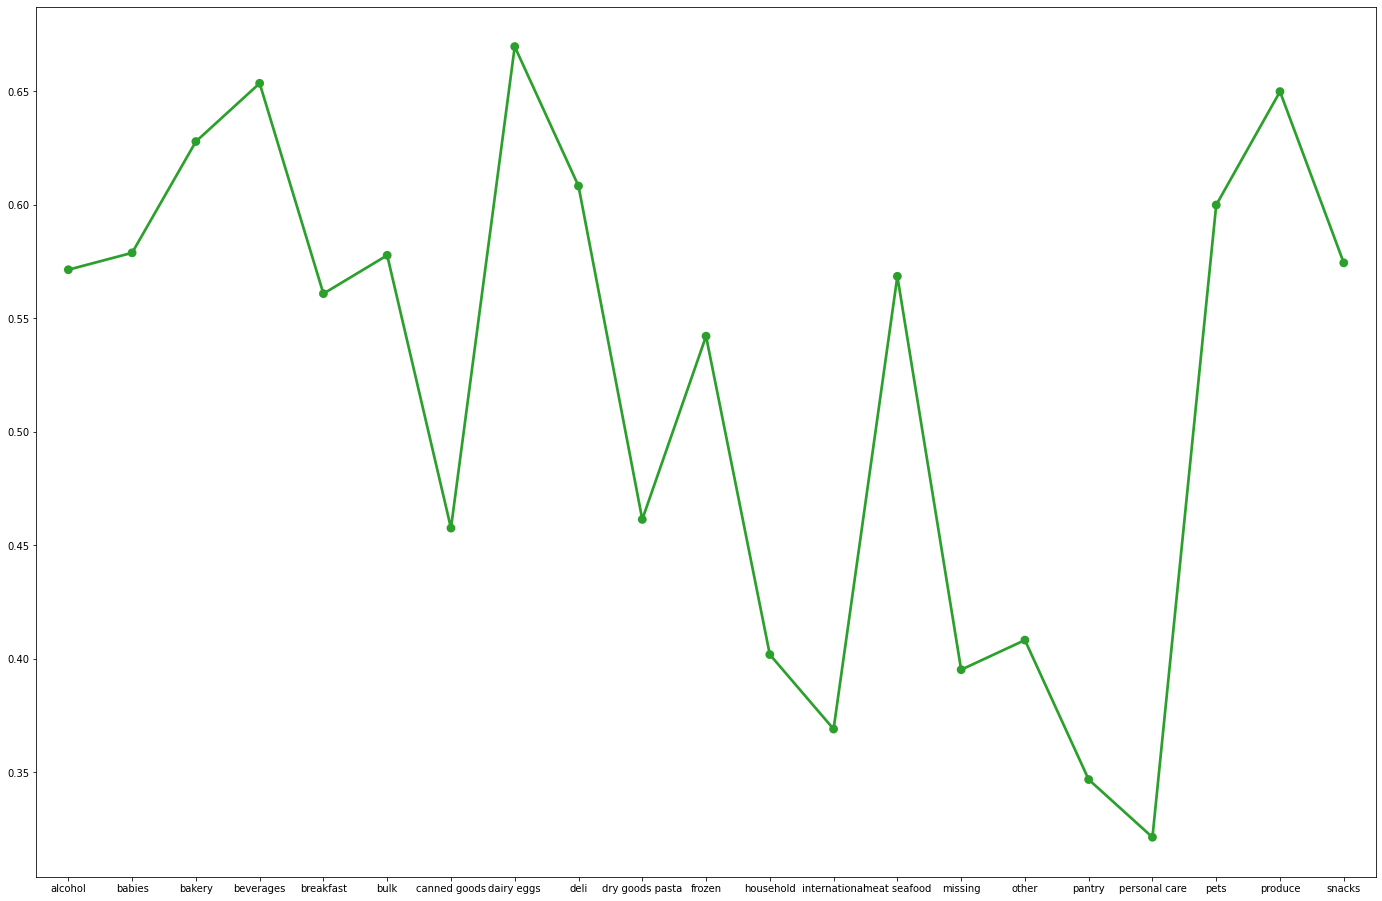

In [ ]:
grouped_df = order_products_prior_df.groupby(["department"])["reordered"].aggregate("mean").reset_index()
grouped_df2 = grouped_df.copy()
plt.figure(figsize=(24,16))
sns.pointplot(grouped_df['department'].values, grouped_df['reordered'].values, alpha=0.8, color=color[2])


# ¿Cuáles son los departamentos con mayor y menor cantidad de proporción de pedidos?

### Aquí su respuesta

Produce y daire and eggs mas altos.
Personal care y internacional meat mas bajos.

---


### Pasillo - Relación de pedidos:

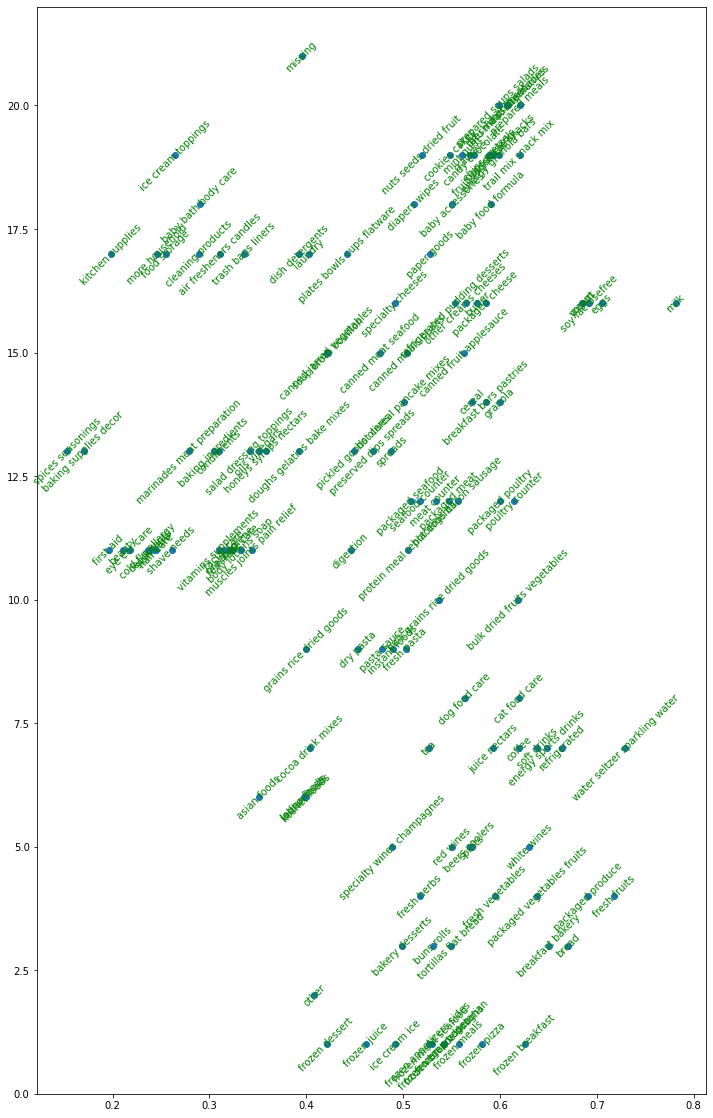

In [ ]:
grouped_df = order_products_prior_df.groupby(["department_id", "aisle"])["reordered"].aggregate("mean").reset_index()

fig, ax = plt.subplots(figsize=(12,20))
ax.scatter(grouped_df.reordered.values, grouped_df.department_id.values)
for i, txt in enumerate(grouped_df.aisle.values):
    ax.annotate(txt, (grouped_df.reordered.values[i], grouped_df.department_id.values[i]), rotation=45, ha='center', va='center', color='green')
#Aqui falta algo...

### Agregar al carrito - Relación de pedidos:

Exploremos ahora la relación entre cómo el orden de agregar el producto al carrito afecta la tasa de reorden.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


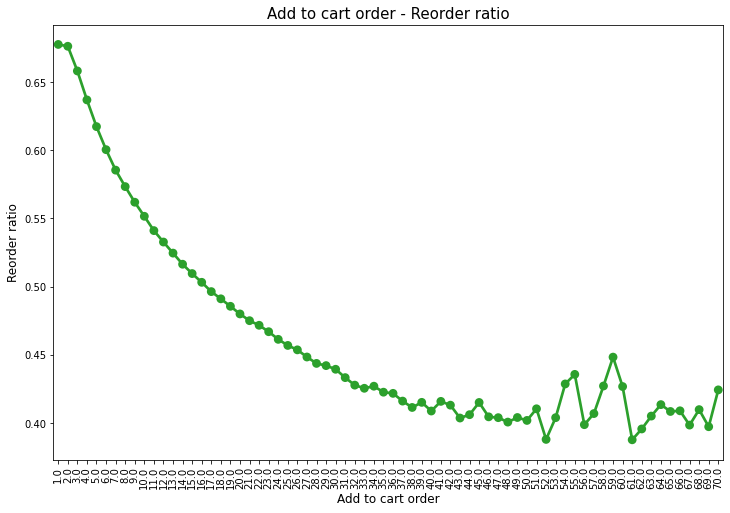

In [ ]:
order_products_prior_df["add_to_cart_order_mod"] = order_products_prior_df["add_to_cart_order"].copy()
order_products_prior_df["add_to_cart_order_mod"].loc[order_products_prior_df["add_to_cart_order_mod"]>70] = 70
grouped_df = order_products_prior_df.groupby(["add_to_cart_order_mod"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['add_to_cart_order_mod'].values, grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.title("Add to cart order - Reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

# ¿Qué podemos interpretar de este gráfico? ¿Hay alguna relación a la probabilidad de volver a elegir dicho producto?


### Aquí su respuesta

Minetras mas productos se agregan menos es la probabilidad de agregar otro producto
---


### Reordenar la proporción por variables basadas en el tiempo:

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


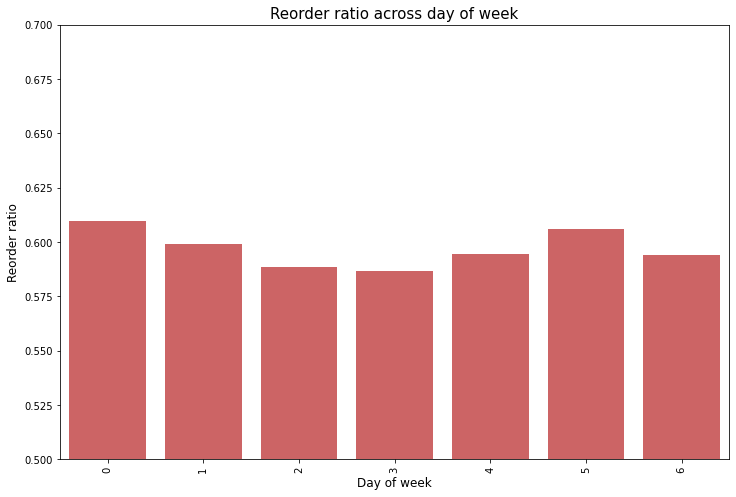

In [ ]:
order_products_train_df = pd.read_csv("./order_products__train.csv")
order_products_train_df = pd.merge(order_products_train_df, orders_df, on='order_id', how='left')
grouped_df = order_products_train_df.groupby(["order_dow"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(grouped_df['order_dow'].values, grouped_df['reordered'].values, alpha=0.8, color=color[3])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.title("Reorder ratio across day of week", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Hour of day')

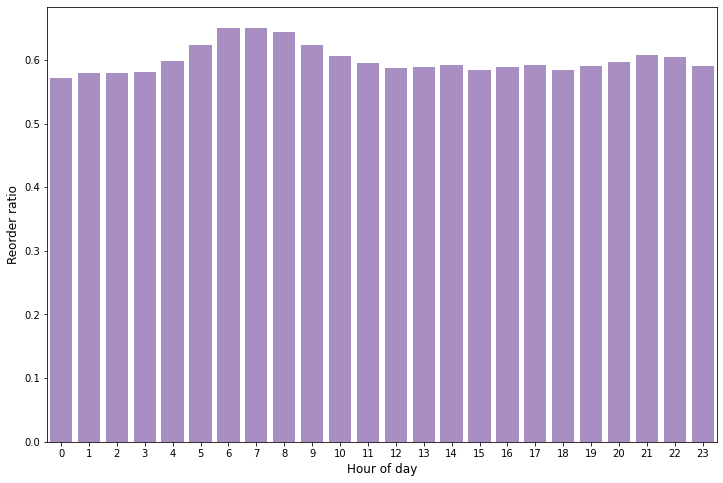

In [ ]:
grouped_df = order_products_train_df.groupby(["order_hour_of_day"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(grouped_df['order_hour_of_day'].values, grouped_df['reordered'].values, alpha=0.8, color=color[4])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)

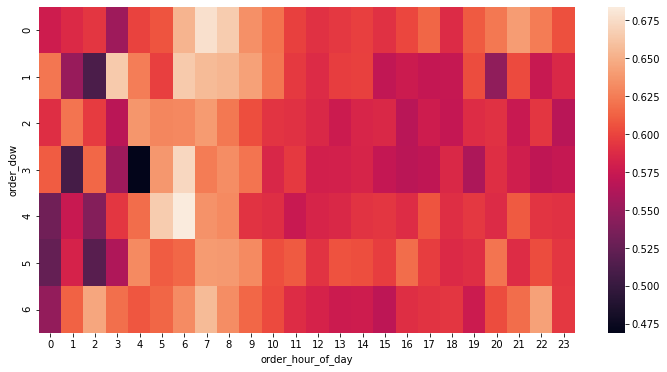

In [ ]:
grouped_df = order_products_train_df.groupby(["order_dow", "order_hour_of_day"])["reordered"].aggregate("mean").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'reordered')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)


# ¿Qué podemos inferir de todo lo anterior? ¿Las tasas de reordenar algo en qué momento del día tienen mayor frecuencia?


### Aquí su respuesta

Las proporciones son mas altas en las manyanas 

----


In [ ]:
## A partir del siguiente árbol de asociación... 
order_products_prior_df = pd.read_csv("./order_products__prior.csv")
order_products_prior_df = pd.merge(order_products_prior_df, products_df, on='product_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, aisles_df, on='aisle_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, departments_df, on='department_id', how='left')
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [ ]:
test = order_products_prior_df.sample(n = 1500)  

In [ ]:
test

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
4956841,523144,23622,4,0,Organic Hot House Tomato,83,4,fresh vegetables,produce
19322594,2037936,47209,20,1,Organic Hass Avocado,24,4,fresh fruits,produce
29739348,3136580,49575,3,1,Chocolate Vanilla Malt Custard,100,21,missing,missing
16562771,1747146,22035,3,1,Organic Whole String Cheese,21,16,packaged cheese,dairy eggs
15013618,1584216,16882,2,1,Baby Spring Mix,123,4,packaged vegetables fruits,produce
...,...,...,...,...,...,...,...,...,...
9433004,995752,25659,1,1,Organic Coconut Milk,91,16,soy lactosefree,dairy eggs
23530697,2481665,13640,7,1,Asian Pears,24,4,fresh fruits,produce
3686318,389381,38689,6,0,Organic Reduced Fat Milk,84,16,milk,dairy eggs
9396827,991916,1818,3,1,Creamy Coconut & Peanut Spread,88,13,spreads,pantry


In [ ]:
pip install --upgrade plotly==4.7.1

     |████████████████████████████████| 11.5MB 2.4MB/s 
  Found existing installation: plotly 4.11.0
    Uninstalling plotly-4.11.0:
      Successfully uninstalled plotly-4.11.0


In [ ]:
import plotly.express as px 
    
fig = px.treemap(test, path=['department', 'product_name'], 
                 values='add_to_cart_order') 
  
fig.show()
#This part of the code doesn't work in colab due to erros on version of plotly :(

TypeError: ignored

¿Cuántos productos únicos se ofrecen en cada departamento / pasillo?

El tamaño de las cajas muestra la cantidad de productos en cada categoría.

### Da una breve explicación de los primeros 3 recuadros